In [1]:
import classifier.AD_test as AD_test
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import torch
from tqdm.notebook import trange, tqdm
from IPython.utils import io

In [2]:
useful_runs_list=[]
stats = glob("out/new_dataset/**/*.npz")
print(len(stats))
stats

26


['out/new_dataset/Nvidia_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/Nvidia_model_resized_bar_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/Nvidia_model_bz_128_lr_0.001_ep_30/statistics.npz',
 'out/new_dataset/Nvidia_model_resized_bz_128_lr_0.001_ep_30/statistics.npz',
 'out/new_dataset/LeNet_bar_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/LeNet_bar_resized_cons_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/LeNet_mod_bar_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/LeNet_bar_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/Nvidia_bar_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/LeNet_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/style_transfer/st_eval_on_generated.npz',
 'out/new_dataset/style_transfer/st_eval_on_openAI.npz',
 'out/new_dataset/style_transfer/st_eval_on_generated_old.npz',
 'out/new_dat

In [3]:
stats.remove('out/new_dataset/style_transfer/st_eval_on_generated.npz')
stats.remove('out/new_dataset/style_transfer/st_eval_on_openAI.npz')
stats.remove('out/new_dataset/style_transfer/st_eval_on_generated_old.npz')
stats

['out/new_dataset/Nvidia_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/Nvidia_model_resized_bar_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/Nvidia_model_bz_128_lr_0.001_ep_30/statistics.npz',
 'out/new_dataset/Nvidia_model_resized_bz_128_lr_0.001_ep_30/statistics.npz',
 'out/new_dataset/LeNet_bar_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/LeNet_bar_resized_cons_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/LeNet_mod_bar_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/LeNet_bar_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/Nvidia_bar_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/LeNet_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/Nvidia_model_resized_cons_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/LeNet_mod_bz_128_lr_0.0001_ep_30/statistics.npz',
 'out/new_dataset/LeNet_bz_128_lr_0.0001_e

In [4]:
for file in stats:
    data = np.load(file, allow_pickle=True)
    max_mean_rew = [np.mean([data['r_histos'][i][-1], data['r_histos'][i+1][-1]]) for i in np.arange(0,22,2)]
    if np.max(max_mean_rew) > 800:
        useful_runs_list.append([file, np.max(max_mean_rew), (np.argmax(max_mean_rew) if np.argmax(max_mean_rew) < 10 else 9)*3])

useful_runs_list.append(['out/new_dataset/Nvidia_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/statistics.npz',
        '773.3215706272156', '24'])
useful_runs_list = np.array(useful_runs_list)
print(useful_runs_list.shape)
useful_runs_list
# out/new_dataset/Nvidia_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/model_ep_3.pth 789.926

(8, 3)


array([['out/new_dataset/Nvidia_model_bz_128_lr_0.001_ep_30/statistics.npz',
        '821.6784215784066', '9'],
       ['out/new_dataset/LeNet_bar_resized_cons_bz_128_lr_0.0001_ep_30/statistics.npz',
        '856.8464991493095', '15'],
       ['out/new_dataset/LeNet_mod_bar_bz_128_lr_0.0001_ep_30/statistics.npz',
        '831.8222044784992', '9'],
       ['out/new_dataset/Nvidia_bar_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/statistics.npz',
        '818.4782744796379', '27'],
       ['out/new_dataset/LeNet_bar_resized_bz_128_lr_0.0001_ep_30/statistics.npz',
        '855.4343907639357', '24'],
       ['out/new_dataset/Nvidia_bar_model_resized_cons_bz_128_lr_0.0001_ep_30/statistics.npz',
        '841.1044719642064', '27'],
       ['out/new_dataset/LeNet_resized_bz_128_lr_0.0001_ep_30/statistics.npz',
        '840.0532295305022', '0'],
       ['out/new_dataset/Nvidia_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/statistics.npz',
        '773.3215706272156', '24']], dtype='<U89')

In [5]:
useful_runs_list=useful_runs_list[[0,1,5,6,7],:]
useful_runs_list

array([['out/new_dataset/Nvidia_model_bz_128_lr_0.001_ep_30/statistics.npz',
        '821.6784215784066', '9'],
       ['out/new_dataset/LeNet_bar_resized_cons_bz_128_lr_0.0001_ep_30/statistics.npz',
        '856.8464991493095', '15'],
       ['out/new_dataset/Nvidia_bar_model_resized_cons_bz_128_lr_0.0001_ep_30/statistics.npz',
        '841.1044719642064', '27'],
       ['out/new_dataset/LeNet_resized_bz_128_lr_0.0001_ep_30/statistics.npz',
        '840.0532295305022', '0'],
       ['out/new_dataset/Nvidia_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/statistics.npz',
        '773.3215706272156', '24']], dtype='<U89')

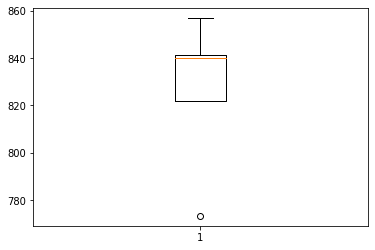

In [6]:
plt.boxplot(useful_runs_list[:,1].astype(float));

In [7]:
# model_vals=[]
#
# for run in tqdm(useful_runs_list, desc="Models"):
#     file,expected,ep= run
#     mod = f"{file[:-14]}model_ep_{int(ep)}.pth"
#     torch.cuda.empty_cache()
#     if "bar" in file:
#         dim =288
#     else:
#         dim= 256
#
#     rew_list=[]
#     for i in trange(10, desc='Simulation runs', leave = False):
#         with io.capture_output() as captured:
#             rew, _ = AD_test.main(False, mod, None, None, dim);
#         rew_list.append(rew)
#     rew_list = np.array(rew_list)
#     model_vals.append([mod, rew_list])
#
# np.savez("out/new_dataset/Classifiers_eval", model_vals=model_vals)

In [8]:
data1 = np.load("out/new_dataset/Classifiers_eval.npz", allow_pickle=True)
model_vals = data1['model_vals']

In [9]:
for i, vals in enumerate(model_vals):
    print(vals[0], np.mean([[v[-1] for v in vals[1]]]), "index", i )

# out/new_dataset/Nvidia_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/model_ep_3.pth 789.926

out/new_dataset/Nvidia_model_bz_128_lr_0.001_ep_30/model_ep_9.pth 735.6485793802406 index 0
out/new_dataset/LeNet_bar_resized_cons_bz_128_lr_0.0001_ep_30/model_ep_15.pth 319.5340253887508 index 1
out/new_dataset/Nvidia_bar_model_resized_cons_bz_128_lr_0.0001_ep_30/model_ep_27.pth 721.1091047832929 index 2
out/new_dataset/LeNet_resized_bz_128_lr_0.0001_ep_30/model_ep_0.pth 505.30388280713294 index 3
out/new_dataset/Nvidia_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/model_ep_24.pth 422.3346279111082 index 4


['out/new_dataset/style_transfer/Nvidia_model_bz_128_lr_0.001_ep_30/style_green/statistics.npz', 'out/new_dataset/style_transfer/Nvidia_model_bz_128_lr_0.001_ep_30/style_brown/statistics.npz', 'out/new_dataset/style_transfer/Nvidia_model_bz_128_lr_0.001_ep_30/style_mixed/statistics.npz']
(3, 3)


array([['out/new_dataset/style_transfer/Nvidia_model_bz_128_lr_0.001_ep_30/style_green/statistics.npz',
        '750.8326007325859', '24'],
       ['out/new_dataset/style_transfer/Nvidia_model_bz_128_lr_0.001_ep_30/style_brown/statistics.npz',
        '728.8323897476923', '6'],
       ['out/new_dataset/style_transfer/Nvidia_model_bz_128_lr_0.001_ep_30/style_mixed/statistics.npz',
        '653.0886790803229', '0']], dtype='<U92')

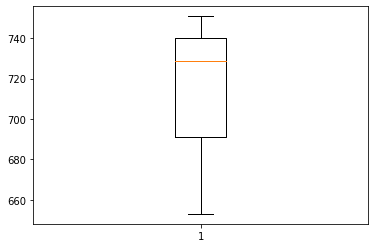

In [10]:
st_runs_list=[]
st_stats = glob("out/new_dataset/style_transfer/Nvidia_model_bz_128_lr_0.001_ep_30/**/*.npz")
print(st_stats)

for file in st_stats:
    data = np.load(file, allow_pickle=True)
    max_mean_rew = [np.mean([data['r_histos'][i][-1], data['r_histos'][i+1][-1]]) for i in np.arange(0,22,2)]

    st_runs_list.append([file, np.max(max_mean_rew),(np.argmax(max_mean_rew) if np.argmax(max_mean_rew) < 10 else 9)*3])
st_runs_list = np.array(st_runs_list)
print(st_runs_list.shape)


plt.boxplot(st_runs_list[:,1].astype(float));
st_runs_list

In [11]:
data = np.load("out/new_dataset/style_transfer/st_eval_on_generated.npz", allow_pickle=True)
style_0=data['style_0']
style_1=data['style_1']
st_model_vals=data['st_model_vals']

In [12]:
for i, vals in enumerate(st_model_vals):
    print(vals[0], np.mean([[v[-1] for v in vals[1]]]), "index", i )

out/old_dataset/LeNet_mod_bz_128_lr_0.0001_ep_30/model_ep_3.pth 618.3815270806456 index 0
out/old_dataset/Nvidia_bar_model_resized_cons_no_bn_bz_256_lr_0.0001_ep_30/model_ep_0.pth 300.4718330816789 index 1
out/new_dataset/Nvidia_model_bz_128_lr_0.001_ep_30/model_ep_9.pth 750.0100398844664 index 2
out/new_dataset/Nvidia_bar_model_resized_cons_bz_128_lr_0.0001_ep_30/model_ep_27.pth 671.4235779023686 index 3
out/new_dataset/style_transfer/Nvidia_model_bz_128_lr_0.001_ep_30/style_green/model_ep_24.pth -40.17638420027506 index 4
out/new_dataset/style_transfer/Nvidia_model_bz_128_lr_0.001_ep_30/style_brown/model_ep_6.pth -76.66657538784766 index 5
out/new_dataset/style_transfer/Nvidia_model_bz_128_lr_0.001_ep_30/style_mixed/model_ep_0.pth -25.734498652761562 index 6


In [13]:
data = np.load("out/old_dataset/Classifiers_eval.npz", allow_pickle=True)

In [14]:
model_vals_old_data = data['arr_0']

In [15]:
for i, vals in enumerate(model_vals_old_data):
    print(vals[0], np.mean([[v[-1] for v in vals[1]]]), "index", i )


out/Nvidia_bar_model_resized_cons_bz_256_lr_0.0001_ep_30/model_ep_18.pth 444.4171671737132 index 0
out/Nvidia_model_resized_bz_64_lr_0.0001_ep_30/model_ep_15.pth 594.3257691311927 index 1
out/LeNet_mod_bz_64_lr_0.0001_ep_30/model_ep_0.pth 653.3480054862666 index 2
out/Nvidia_model_resized_bar_bz_256_lr_0.001_ep_30/model_ep_12.pth 573.3660606544414 index 3
out/Nvidia_model_bz_256_lr_0.0001_ep_30/model_ep_18.pth 573.7934920137321 index 4
out/LeNet_mod_bz_128_lr_0.0001_ep_30/model_ep_3.pth 738.5943999116076 index 5
out/LeNet_resized_cons_no_bn_bz_64_lr_0.001_ep_30/model_ep_9.pth 513.8843771016221 index 6
out/Nvidia_model_resized_cons_no_bn_bz_256_lr_0.001_ep_30/model_ep_3.pth 675.5836740793337 index 7
out/LeNet_bar_resized_cons_no_bn_bz_64_lr_0.0001_ep_30/model_ep_21.pth 580.0682033508656 index 8
out/LeNet_bar_resized_cons_no_bn_bz_256_lr_0.001_ep_30/model_ep_6.pth 339.5994587594741 index 9
out/LeNet_resized_cons_bz_128_lr_0.001_ep_30/model_ep_0.pth 692.1173826211203 index 10
out/Nvidia_b


# new dataste
* Best model without bar:
    * out/new_dataset/Nvidia_model_bz_128_lr_0.001_ep_30/model_ep_9.pth 735.6485793802406 index 0
* Best model with bar:
    * out/new_dataset/Nvidia_bar_model_resized_cons_bz_128_lr_0.0001_ep_30/model_ep_27.pth  644.650 index 6

# Old dataset
* Best model without bar:
    * out/old_dataset/LeNet_mod_bz_128_lr_0.0001_ep_30/model_ep_3.pth 738.5943999116076
* Best model with bar:
    * out/old_dataset/Nvidia_bar_model_resized_cons_no_bn_bz_256_lr_0.0001_ep_30/model_ep_0.pth 643.763041599401


* out/new_dataset/style_transfer/Nvidia_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/style_green/model_ep_24.pth
* out/new_dataset/style_transfer/Nvidia_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/style_brown/model_ep_15.pth
* out/new_dataset/style_transfer/Nvidia_model_resized_cons_no_bn_bz_128_lr_0.0001_ep_30/style_mixed/model_ep_18.pth


In [16]:
div_data = np.load("../runs/New_runs_with_car/Dataset_div.npz")
div_data.files

['train_files', 'test_files']

In [17]:
old_dataset_rew = []
for file in div_data['train_files']:
    data = np.load("../"+file)
    aux = data["r_history"]
    if aux[-1] < 900:
        print(file)
        #exit()
    else:
        old_dataset_rew += [aux[-1]]

runs/New_runs_with_car/2021-06-29 16:38:05.479982/discrete_histories.npz
runs/New_runs_with_car/2021-06-29 16:23:41.048150/discrete_histories.npz
runs/New_runs_with_car/2021-06-29 19:48:07.739925/discrete_histories.npz
runs/New_runs_with_car/2021-06-29 16:48:50.495339/discrete_histories.npz
runs/New_runs_with_car/2021-06-29 18:33:34.677150/discrete_histories.npz
runs/New_runs_with_car/2021-06-29 19:17:39.922492/discrete_histories.npz
runs/New_runs_with_car/2021-06-29 18:28:42.346106/discrete_histories.npz
runs/New_runs_with_car/2021-06-29 18:24:17.334509/discrete_histories.npz
runs/New_runs_with_car/2021-06-29 16:15:30.820242/discrete_histories.npz
runs/New_runs_with_car/2021-06-29 16:24:58.067796/discrete_histories.npz
runs/New_runs_with_car/2021-06-29 19:19:59.772719/discrete_histories.npz
runs/New_runs_with_car/2021-06-29 19:28:42.756503/discrete_histories.npz
runs/New_runs_with_car/2021-06-29 19:02:20.321908/discrete_histories.npz
runs/New_runs_with_car/2021-06-29 16:22:57.020179/d

In [18]:
div_data = np.load("../runs/New_runs_with_car_corrected/Dataset_div.npz")
div_data.files

['train_files', 'test_files']

In [19]:
rew_new = []
for file in div_data['train_files']:
    data = np.load("../"+file)
    aux = data["r_history"]
    if aux[-1] < 900:
        print(file)
        exit()
    rew_new += [aux[-1]]






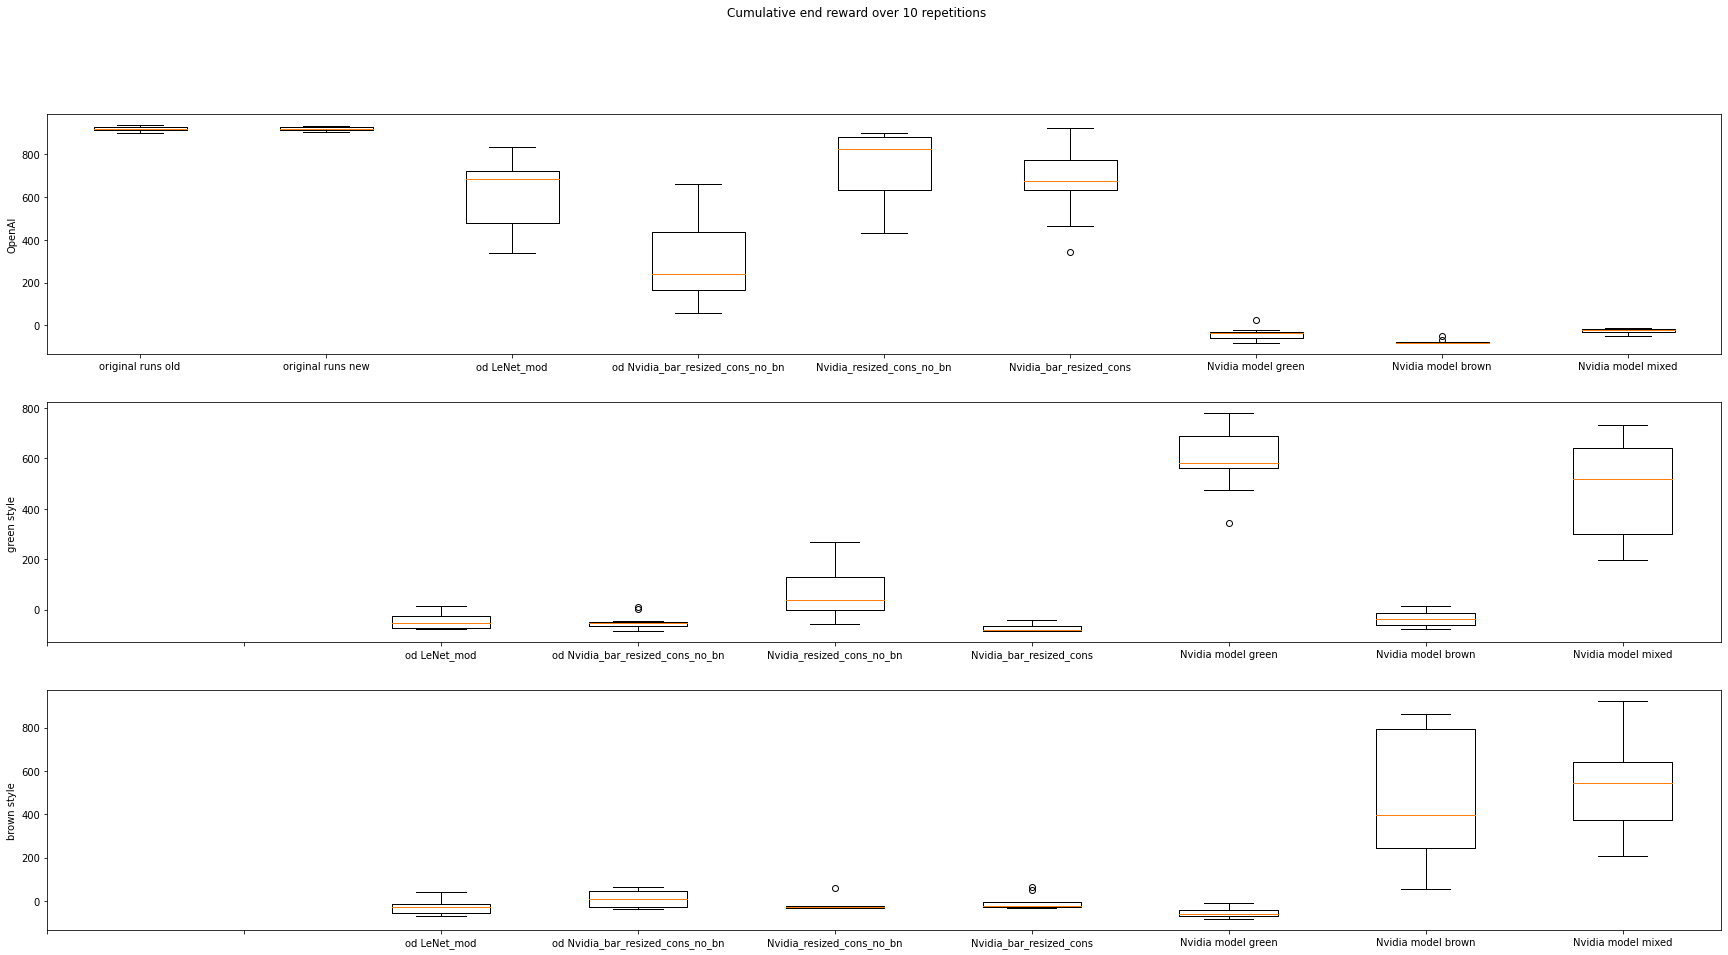

In [21]:
fig, ax = plt.subplots(3, figsize=(30,15))
fig.suptitle("Cumulative end reward over 10 repetitions")
ax[0].boxplot([old_dataset_rew,rew_new]+[[j[-1] for j in v[1]] for v in st_model_vals], positions=[0,1,2,3,4,5,6,7,8] )
ax[0].set_xticks([0, 1, 2,3,4,5,6,7,8])
ax[0].set_xticklabels(["original runs old", "original runs new", "od LeNet_mod", "od Nvidia_bar_resized_cons_no_bn", "Nvidia_resized_cons_no_bn", "Nvidia_bar_resized_cons", "Nvidia model green","Nvidia model brown","Nvidia model mixed"])
ax[0].set_ylabel("OpenAI")

ax[1].boxplot([[j[-1] for j in v[1]] for v in style_0], positions=[2,3,4,5,6,7,8] )
ax[1].set_xticks([0, 1, 2,3,4,5,6,7,8])
ax[1].set_xticklabels([" ", " ", "od LeNet_mod", "od Nvidia_bar_resized_cons_no_bn", "Nvidia_resized_cons_no_bn", "Nvidia_bar_resized_cons", "Nvidia model green","Nvidia model brown","Nvidia model mixed"])
ax[1].set_ylabel("green style ")


ax[2].boxplot([[j[-1] for j in v[1]] for v in style_1], positions=[2,3,4,5,6,7,8] )
ax[2].set_xticks([0, 1, 2,3,4,5,6,7,8])
ax[2].set_xticklabels([" ", " ", "od LeNet_mod", "od Nvidia_bar_resized_cons_no_bn", "Nvidia_resized_cons_no_bn", "Nvidia_bar_resized_cons", "Nvidia model green","Nvidia model brown","Nvidia model mixed"])
ax[2].set_ylabel("brown style")
plt.savefig("../Slides/new_figures/reward_comp.png", dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)
plt.show()